Transactions Summary:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
Products Summary:
             Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
Customer Regions:
 South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


<Figure size 1000x600 with 0 Axes>

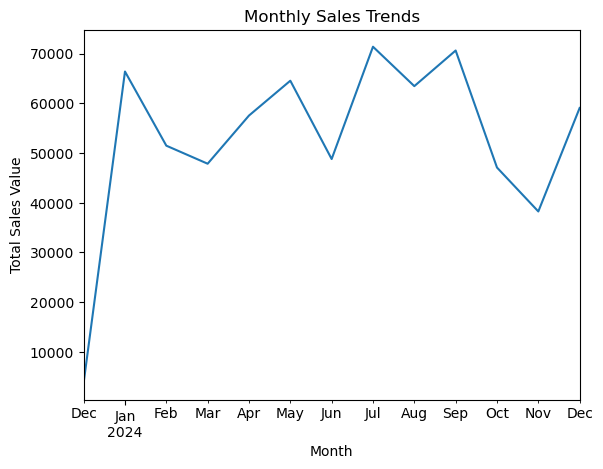

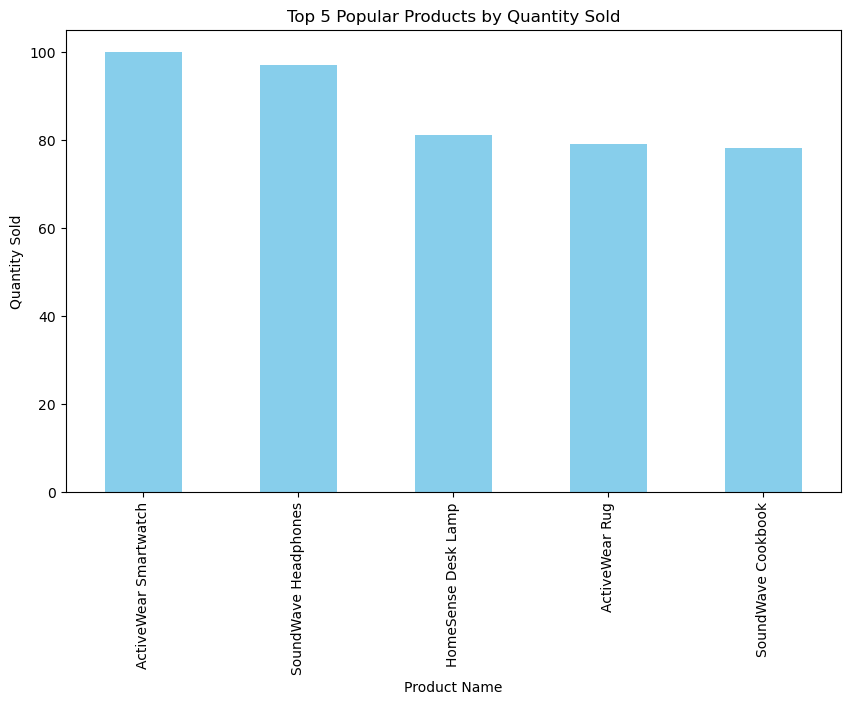

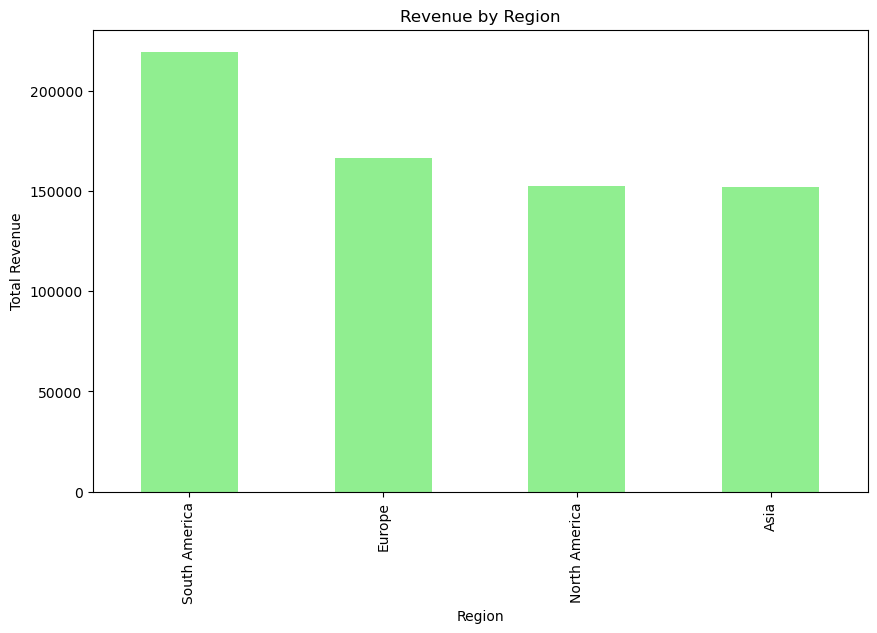

Business Insights:

1. South America generates the highest revenue ($219,352), followed by Europe and North America.
2. Sales peak in July and September 2024, indicating seasonal buying patterns.
3. Top-selling products include ActiveWear Smartwatch and SoundWave Headphones.
4. Average transaction value is $690, with a typical purchase quantity of ~2.5.
5. Products are priced between $16.08 and $497.76, with an average of $267.55.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transactions = pd.read_csv('C:/Users/CHIRAG JAGGA/Downloads/Transactions.csv')
products = pd.read_csv('C:/Users/CHIRAG JAGGA/Downloads/Products.csv')
customers = pd.read_csv('C:/Users/CHIRAG JAGGA/Downloads/Customers.csv')

# Convert date columns to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Merge datasets
merged_data = transactions.merge(products, on='ProductID', how='left').merge(customers, on='CustomerID', how='left')

# Descriptive Statistics
print("Transactions Summary:\n", transactions.describe())
print("Products Summary:\n", products.describe())
print("Customer Regions:\n", customers['Region'].value_counts())

# Monthly Sales Trends
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).agg({'TotalValue': 'sum'})
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', legend=False)
plt.title('Monthly Sales Trends')
plt.ylabel('Total Sales Value')
plt.xlabel('Month')
plt.show()

# Top Products
popular_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Popular Products by Quantity Sold')
plt.ylabel('Quantity Sold')
plt.xlabel('Product Name')
plt.show()

# Revenue by Region
top_regions = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_regions.plot(kind='bar', color='lightgreen')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.show()

# Insights
print("Business Insights:\n")
print("1. South America generates the highest revenue ($219,352), followed by Europe and North America.")
print("2. Sales peak in July and September 2024, indicating seasonal buying patterns.")
print("3. Top-selling products include ActiveWear Smartwatch and SoundWave Headphones.")
print("4. Average transaction value is $690, with a typical purchase quantity of ~2.5.")
print("5. Products are priced between $16.08 and $497.76, with an average of $267.55.")
